In [ ]:
"""복습 과제에서도 정리했듯이, Simpleimputer는 평균, 중간값, 최빈값, 상수 등 기본적인 값으로
   결측치를 채우게 된다."""

'복습 과제에서도 정리했듯이, Simpleimputer는 평균, 중간값, 최빈값, 상수 등 기본적인 값으로\n   결측치를 채우게 된다.'

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df = sns.load_dataset('mpg')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df_r = df[['cylinders','displacement','horsepower','acceleration','weight']]

In [ ]:
msv = np.random.randint(0,382,size=40)

In [ ]:
df_r.iloc[msv] = np.nan

In [ ]:
df_r.isna().sum()

cylinders       40
displacement    40
horsepower      40
acceleration    40
weight          40
dtype: int64

In [ ]:
df_r = pd.concat([df_r,df['mpg']],axis=1)

In [ ]:
df_r
df_n = df_r
df_median = df_r
df_frequent = df_r

In [ ]:
# 단순 평균값을 이용해서 직접 대치해보자.

In [ ]:
print(df_r.cylinders.mean(),
df_r.displacement.mean(),
df_r.horsepower.mean(),
df_r.weight.mean(),
df_r.acceleration.mean())

5.480113636363637 195.4559659090909 104.95454545454545 2992.8039772727275 15.528409090909092


In [ ]:
df_r['cylinders'] = df_r['cylinders'].fillna(df_r.cylinders.mean())
df_r['displacement'] = df_r['displacement'].fillna(df_r.displacement.mean())
df_r['horsepower'] = df_r['horsepower'].fillna(df_r.horsepower.mean())
df_r['weight'] = df_r['weight'].fillna(df_r.weight.mean())
df_r.acceleration = df_r.acceleration.fillna(df_r.acceleration.mean()) #.으로 연결해도 됨.

In [ ]:
print(df_r)

     cylinders  displacement  horsepower  acceleration       weight   mpg
0     8.000000    307.000000  130.000000     12.000000  3504.000000  18.0
1     8.000000    350.000000  165.000000     11.500000  3693.000000  15.0
2     5.480114    195.455966  104.954545     15.528409  2992.803977  18.0
3     5.480114    195.455966  104.954545     15.528409  2992.803977  16.0
4     8.000000    302.000000  140.000000     10.500000  3449.000000  17.0
..         ...           ...         ...           ...          ...   ...
393   4.000000    140.000000   86.000000     15.600000  2790.000000  27.0
394   4.000000     97.000000   52.000000     24.600000  2130.000000  44.0
395   4.000000    135.000000   84.000000     11.600000  2295.000000  32.0
396   4.000000    120.000000   79.000000     18.600000  2625.000000  28.0
397   4.000000    119.000000   82.000000     19.400000  2720.000000  31.0

[392 rows x 6 columns]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_r.drop('mpg',axis=1), df_r['mpg'],test_size=0.3,random_state=42)

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
fit_train_1 = sm.OLS(y_train,x_train)


In [ ]:
fit_train_1 = fit_train_1.fit()

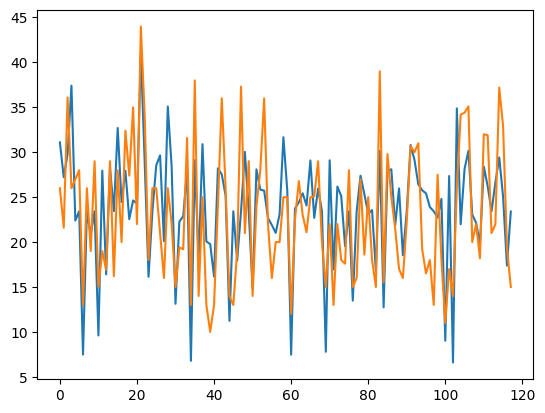

In [ ]:
plt.plot(np.array(fit_train_1.predict(x_test)),label = 'pred')
plt.plot(np.array(y_test),label = 'real')
plt.legend
plt.show() # -> 결측치를 평균으로 대치했을 때 도시된 그래프

In [ ]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred =fit_train_1.predict(x_test))
print(mse1)

32.054258631808146


In [ ]:
#단순 평균으로 대치하면 30으로 나옴

In [ ]:
imputer1 = SimpleImputer(strategy = 'mean' )
df_n1 = imputer1.fit_transform(df_n)

In [ ]:
df_n1

array([[   8.        ,  307.        ,  130.        ,   12.        ,
        3504.        ,   18.        ],
       [   8.        ,  350.        ,  165.        ,   11.5       ,
        3693.        ,   15.        ],
       [   5.48011364,  195.45596591,  104.95454545,   15.52840909,
        2992.80397727,   18.        ],
       ...,
       [   4.        ,  135.        ,   84.        ,   11.6       ,
        2295.        ,   32.        ],
       [   4.        ,  120.        ,   79.        ,   18.6       ,
        2625.        ,   28.        ],
       [   4.        ,  119.        ,   82.        ,   19.4       ,
        2720.        ,   31.        ]])

In [ ]:
df_n1 = pd.DataFrame(df_n1)

In [ ]:
df_n1.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [ ]:
df_n1

,0,1,2,3,4,5
0,8.000000,307.000000,130.000000,12.000000,3504.000000,18.0
1,8.000000,350.000000,165.000000,11.500000,3693.000000,15.0
2,5.480114,195.455966,104.954545,15.528409,2992.803977,18.0
3,5.480114,195.455966,104.954545,15.528409,2992.803977,16.0
4,8.000000,302.000000,140.000000,10.500000,3449.000000,17.0
...,...,...,...,...,...,...
387,4.000000,140.000000,86.000000,15.600000,2790.000000,27.0
388,4.000000,97.000000,52.000000,24.600000,2130.000000,44.0
389,4.000000,135.000000,84.000000,11.600000,2295.000000,32.0
390,4.000000,120.000000,79.000000,18.600000,2625.000000,28.0


In [ ]:
df_n1.columns = df_r.columns

In [ ]:
df_n1

,cylinders,displacement,horsepower,acceleration,weight,mpg
0,8.000000,307.000000,130.000000,12.000000,3504.000000,18.0
1,8.000000,350.000000,165.000000,11.500000,3693.000000,15.0
2,5.480114,195.455966,104.954545,15.528409,2992.803977,18.0
3,5.480114,195.455966,104.954545,15.528409,2992.803977,16.0
4,8.000000,302.000000,140.000000,10.500000,3449.000000,17.0
...,...,...,...,...,...,...
387,4.000000,140.000000,86.000000,15.600000,2790.000000,27.0
388,4.000000,97.000000,52.000000,24.600000,2130.000000,44.0
389,4.000000,135.000000,84.000000,11.600000,2295.000000,32.0
390,4.000000,120.000000,79.000000,18.600000,2625.000000,28.0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_n1.drop('mpg',axis=1), df_n1['mpg'],test_size=0.3,random_state=42)

In [ ]:
fit_train_2 = sm.OLS(y_train,x_train)
fit_train_2 = fit_train_2.fit()

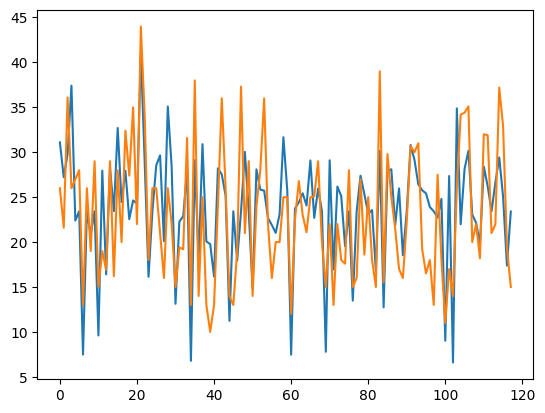

In [ ]:
plt.plot(np.array(fit_train_2.predict(x_test)),label = 'pred')
plt.plot(np.array(y_test),label = 'real')
plt.legend
plt.show() #simple imputer에서 method를 mean으로 설정

In [ ]:

mse2 = mean_squared_error(y_true = y_test, y_pred =fit_train_2.predict(x_test))
print(mse2)

32.054258631808146


In [ ]:
print('{} : 평균 대치 , {} : SimpleImputer'.format(mse1, mse2))

32.054258631808146 : 평균 대치 , 32.054258631808146 : SimpleImputer


In [ ]:
#똑같은 값이 나왔으므로 Simpleimputer가 올바르게 수행된 것을 알 수 있다.
# 중간값, 최빈값에 대해선 어떻게 진행될까?

In [ ]:
print(df_r.cylinders.median(),
df_r.displacement.median(),
df_r.horsepower.median(),
df_r.weight.median(),
df_r.acceleration.median())

5.480113636363637 177.0 97.0 2953.5 15.528409090909092


In [ ]:
df_median
df_frequent

,cylinders,displacement,horsepower,acceleration,weight,mpg
0,8.000000,307.000000,130.000000,12.000000,3504.000000,18.0
1,8.000000,350.000000,165.000000,11.500000,3693.000000,15.0
2,5.480114,195.455966,104.954545,15.528409,2992.803977,18.0
3,5.480114,195.455966,104.954545,15.528409,2992.803977,16.0
4,8.000000,302.000000,140.000000,10.500000,3449.000000,17.0
...,...,...,...,...,...,...
393,4.000000,140.000000,86.000000,15.600000,2790.000000,27.0
394,4.000000,97.000000,52.000000,24.600000,2130.000000,44.0
395,4.000000,135.000000,84.000000,11.600000,2295.000000,32.0
396,4.000000,120.000000,79.000000,18.600000,2625.000000,28.0


In [ ]:
imputer2 = SimpleImputer(strategy = 'median' )
df_n2 = imputer2.fit_transform(df_median)

imputer3 = SimpleImputer(strategy = 'most_frequent' )
df_n3 = imputer3.fit_transform(df_frequent)

In [ ]:
df_n2 = pd.DataFrame(df_n2)
df_n3 = pd.DataFrame(df_n3)

In [ ]:
df_n2

,0,1,2,3,4,5
0,8.000000,307.000000,130.000000,12.000000,3504.000000,18.0
1,8.000000,350.000000,165.000000,11.500000,3693.000000,15.0
2,5.480114,195.455966,104.954545,15.528409,2992.803977,18.0
3,5.480114,195.455966,104.954545,15.528409,2992.803977,16.0
4,8.000000,302.000000,140.000000,10.500000,3449.000000,17.0
...,...,...,...,...,...,...
387,4.000000,140.000000,86.000000,15.600000,2790.000000,27.0
388,4.000000,97.000000,52.000000,24.600000,2130.000000,44.0
389,4.000000,135.000000,84.000000,11.600000,2295.000000,32.0
390,4.000000,120.000000,79.000000,18.600000,2625.000000,28.0


In [ ]:
df_n3

,0,1,2,3,4,5
0,8.000000,307.000000,130.000000,12.000000,3504.000000,18.0
1,8.000000,350.000000,165.000000,11.500000,3693.000000,15.0
2,5.480114,195.455966,104.954545,15.528409,2992.803977,18.0
3,5.480114,195.455966,104.954545,15.528409,2992.803977,16.0
4,8.000000,302.000000,140.000000,10.500000,3449.000000,17.0
...,...,...,...,...,...,...
387,4.000000,140.000000,86.000000,15.600000,2790.000000,27.0
388,4.000000,97.000000,52.000000,24.600000,2130.000000,44.0
389,4.000000,135.000000,84.000000,11.600000,2295.000000,32.0
390,4.000000,120.000000,79.000000,18.600000,2625.000000,28.0


In [ ]:
df_n2.columns = df_r.columns
df_n3.columns = df_r.columns

In [ ]:
print(np.count_nonzero(df_n1==df_n2))
print(df_n1.size) # 왜 그런진 모르겠으나, 중간값의 경우 기존의 평균 대치와 동일한 결과값이 도출되었다.

2352
2352


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_n2.drop('mpg',axis=1), df_n2['mpg'],test_size=0.3,random_state=42)



In [ ]:
fit_train_3 = sm.OLS(y_train,x_train)
fit_train_3 = fit_train_3.fit()
mse3 = mean_squared_error(y_true = y_test, y_pred =fit_train_3.predict(x_test))
print(mse3) #때문에 결과값도 동일하게 도출되었고, 이는 최빈값도 마찬가지이다.

34.242988509639595
